In [215]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torch
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np

In [216]:
import pandas as pd
import io
import pickle

In [217]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
file_path = 'BatchNormCNN/data.pickle'
with open(file_path , 'rb') as f:
    contents = CPU_Unpickler(f).load()

In [218]:
with open('BaselineCNN/data.pickle' , 'rb') as f:
    start = CPU_Unpickler(f).load()
with open('BatchNormCNN/data.pickle' , 'rb') as f:
    norm = CPU_Unpickler(f).load()

In [219]:
print(start.keys(), "\n")
print(norm.keys())

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'model', 'batch_size', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1']) 

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'model', 'batch_size', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1', 'batchnorm_moment'])


<h2><b>Comparision between Baseline and Baseline + BatchNorm</b></h2>

In [159]:
start_time = start['train_time_list']
norm_time = norm['train_time_list']

start_val_loss = start['val_loss_list']
norm_val_loss = norm['val_loss_list']

Text(0.5, 0.98, 'Comparision between Baseline Model and Baseline Model + BatchNorm')

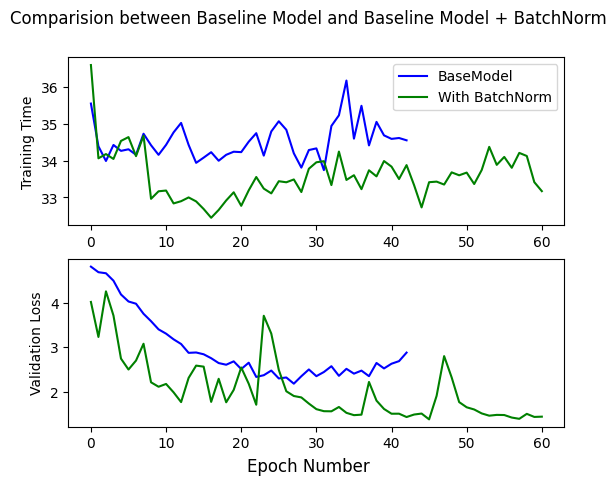

In [160]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(start_time, color= 'b', label = 'BaseModel')
ax1.plot(norm_time, color='g', label = 'With BatchNorm')
ax1.set(ylabel = 'Training Time')
ax1.legend()

ax2.plot(start_val_loss, color= 'b')
ax2.plot(norm_val_loss, color='g')
ax2.set(ylabel = 'Validation Loss')
fig.supxlabel('Epoch Number')
fig.suptitle("Comparision between Baseline Model and Baseline Model + BatchNorm")

<h2><b>Hyperparamter Tuning of BatchNorm</b></h2>

In [161]:
with open('BatchNormReducedCNN1/data.pickle' , 'rb') as f:
    cnn1 = CPU_Unpickler(f).load()
with open('BatchNormReducedCNN5/data.pickle' , 'rb') as f:
    cnn5 = CPU_Unpickler(f).load()
with open('BatchNormReducedCNN10/data.pickle' , 'rb') as f:
    cnn10 = CPU_Unpickler(f).load()

In [162]:
cnn1_train = cnn1['train_loss_list']
cnn5_train = cnn5['train_loss_list']
cnn10_train = cnn10['train_loss_list']
dic = {i:(cnn1_train[i], cnn5_train[i], cnn10_train[i]) for i in range(47)}

In [163]:
x = np.arange(1,48)
print(len(x))
len(cnn1_train)

47


47

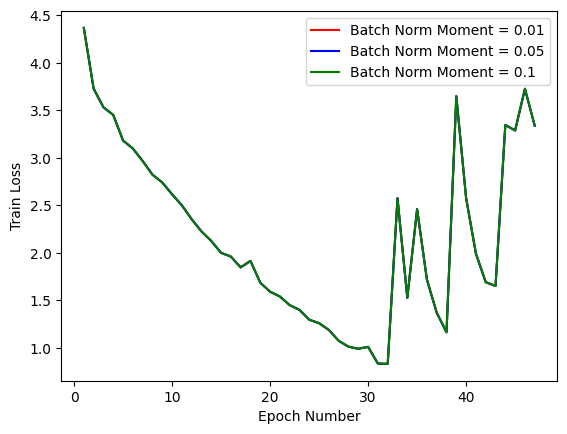

In [164]:
plt.plot(x,cnn1_train, color = 'r', label = 'Batch Norm Moment = 0.01')
plt.plot(x, cnn5_train, color = 'b', label = 'Batch Norm Moment = 0.05')
plt.plot(x, cnn10_train, color = 'g',label = 'Batch Norm Moment = 0.1')
plt.xlabel("Epoch Number")
plt.ylabel("Train Loss")
plt.legend()
plt.show()

In [165]:
def plotting(name, ylabel):
    cnn1_train = cnn1[name]
    cnn5_train = cnn5[name]
    cnn10_train = cnn10[name]
    x = np.arange(1,len(cnn1_train)+1)
    plt.plot(x,cnn1_train, color = 'r', label = 'Batch Norm Moment = 0.01')
    plt.plot(x, cnn5_train, color = 'b', label = 'Batch Norm Moment = 0.05')
    plt.plot(x, cnn10_train, color = 'g',label = 'Batch Norm Moment = 0.1')
    plt.xlabel("Epoch Number")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f'{ylabel} for different batch norm')
    plt.savefig(f'{ylabel}.png')
    plt.show()

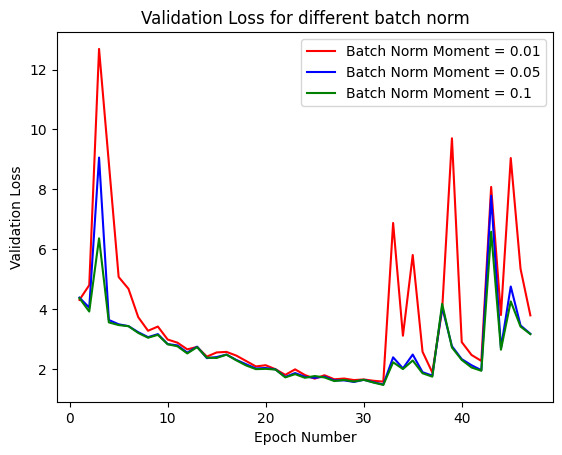

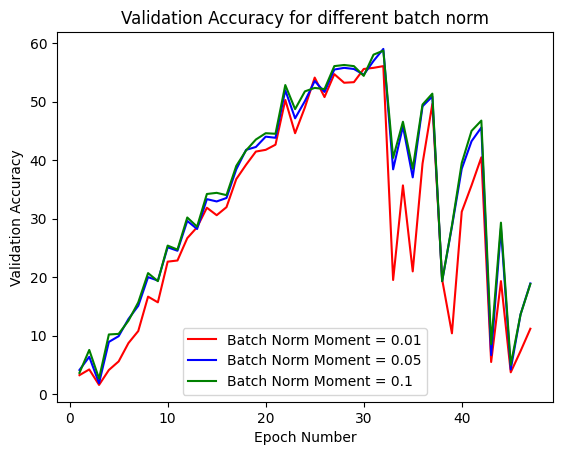

In [166]:
plotting('val_loss_list', 'Validation Loss')
plotting('val_acc_list', 'Validation Accuracy')

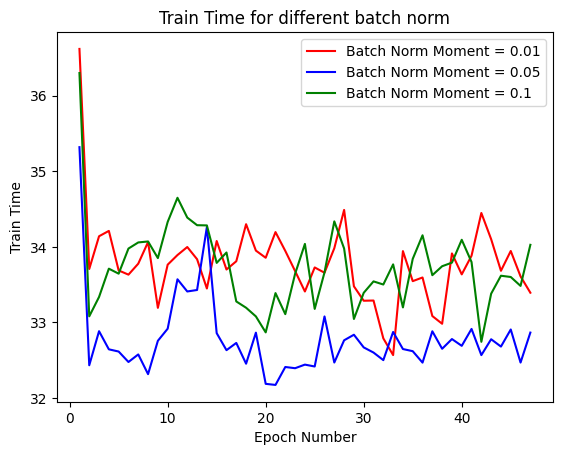

In [167]:
plotting('train_time_list', 'Train Time')

Batch norm = <b>0.05</b> is optimal. 0.05 and 0.1 batch norm has similar accuracy but Batch norm = 0.05 takes shorter time to train compared to 0.1.

<h2><b>Depthpoint model VS BatchNorm</b></h2>

In [168]:
optimal = cnn5
with open('DepthPointWiseModel/data.pickle' , 'rb') as f:
    dp = CPU_Unpickler(f).load()

In [144]:
dp.keys()
print('\n')
print(optimal.keys())



dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'model', 'batch_size', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1', 'batchnorm_moment'])


In [175]:
optimal_time = cnn5['train_time_list']
dp_time = dp['train_time_list']

optimal_val_loss = cnn5['val_loss_list']
dp_val_loss = dp['val_loss_list']

Text(0.5, 0.98, 'Comparision between BatchNorm and BatchNorm + Convolution')

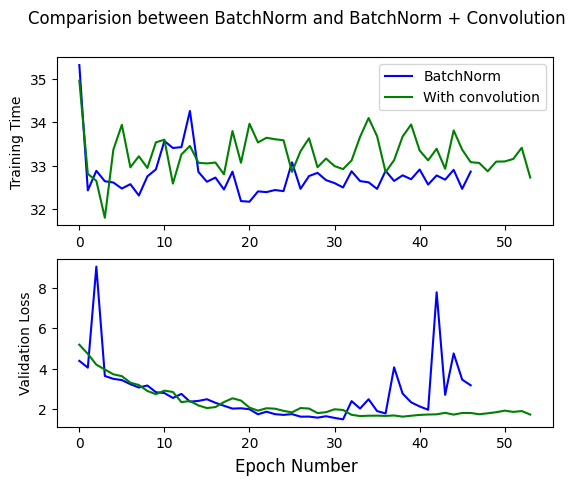

In [139]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(optimal_time, color= 'b', label = 'BatchNorm')
ax1.plot(dp_time, color='g', label = 'With convolution')
ax1.set(ylabel = 'Training Time')
ax1.legend()

ax2.plot(optimal_val_loss, color= 'b')
ax2.plot(dp_val_loss, color='g')
ax2.set(ylabel = 'Validation Loss')
fig.supxlabel('Epoch Number')
fig.suptitle("Comparision between BatchNorm and BatchNorm + Convolution")

In [149]:
print(dp['top_1_accuracy'], optimal['top_1_accuracy'])
print(dp['top_5_accuracy'], optimal['top_5_accuracy'])

0.6019607843137255 0.5784313725490197
0.8323529411764706 0.8313725490196079


<h2>Moving on to One-cycle policy</h2>

In [150]:
with open('OneCycleLRTest/data.pickle' , 'rb') as f:
    cycle = CPU_Unpickler(f).load()

In [151]:
cycle.keys()

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'batch_size', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'early_stop', 'lr_list'])

In [153]:
lr_list = cycle['lr_list']
train_loss_list = cycle['train_loss_list']

Text(0.5, 1.0, 'Graph of training loss compared to learning rate for 1 cycle')

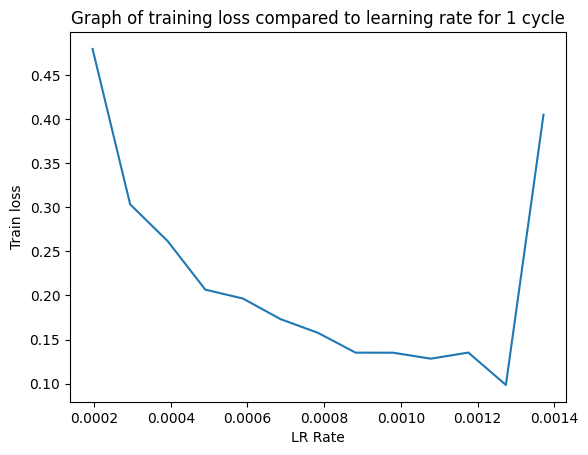

In [158]:
plt.plot(lr_list, train_loss_list)
plt.xlabel('LR Rate')
plt.ylabel('Train loss')
plt.title('Graph of training loss compared to learning rate for 1 cycle')

In [169]:
with open('OneCycleLRModel/data.pickle' , 'rb') as f:
    cycleModel = CPU_Unpickler(f).load()

In [170]:
cycleModel.keys()

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'batch_size', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'lr_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1', 'batchnorm_moment'])

In [176]:
cycle_time = cycleModel['train_time_list']
cycle_val_loss = cycleModel['val_loss_list']

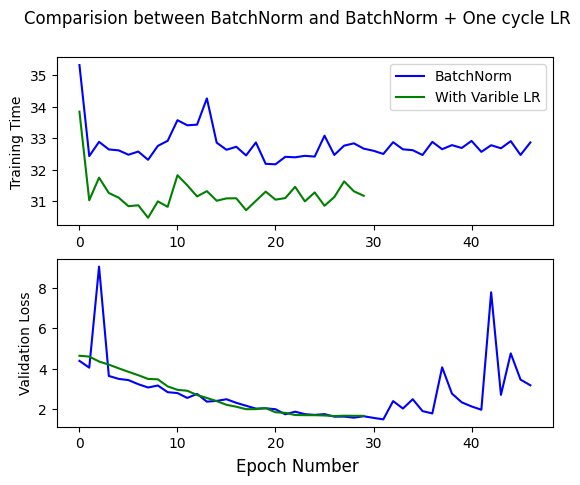

In [205]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(optimal_time, color= 'b', label = 'BatchNorm')
ax1.plot(cycle_time, color='g', label = 'With Varible LR')
ax1.set(ylabel = 'Training Time')
ax1.legend()

ax2.plot(optimal_val_loss, color= 'b')
ax2.plot(cycle_val_loss, color='g')
ax2.set(ylabel = 'Validation Loss')
fig.supxlabel('Epoch Number')
fig.suptitle("Comparision between BatchNorm and BatchNorm + One cycle LR")
fig.savefig("LR with and without.png")

In [179]:
cycle_acc = cycleModel['val_acc_list']
optimal_acc = cnn5['val_acc_list']

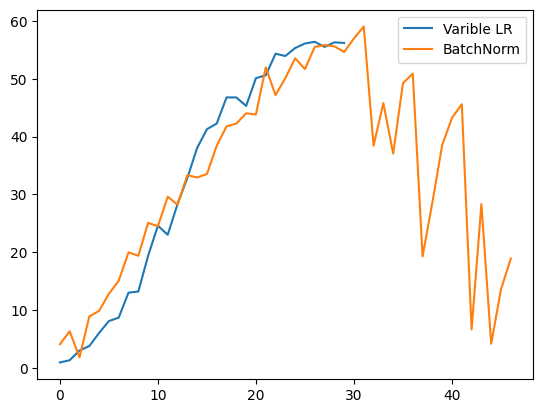

In [182]:
plt.plot(cycle_acc, label = 'Varible LR')
plt.plot(optimal_acc, label = 'BatchNorm')
plt.legend()

<h2>Since one cycle LR has similar Validaiton loss but much faster training time compared to batchNorm. We shall use it insted. </h2>

In [183]:
with open('MixUpModel/data.pickle' , 'rb') as f:
    mixUp = CPU_Unpickler(f).load()

In [186]:
mixUp.keys()

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'batch_size', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'lr_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1', 'batchnorm_moment'])

In [190]:
mixUp_time = mixUp['train_time_list']
mixUp_val_loss = mixUp['val_loss_list']

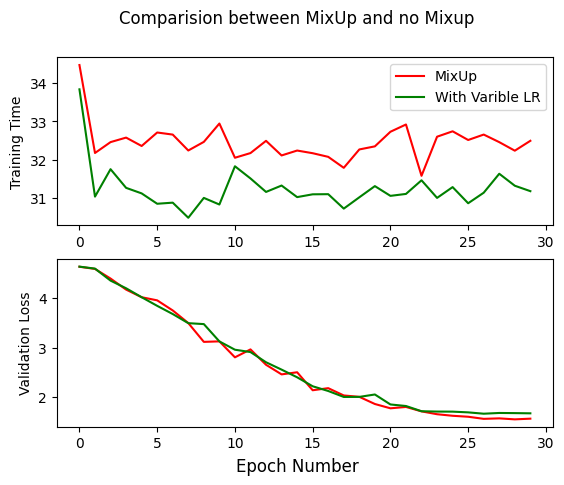

In [203]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(mixUp_time, color= 'r', label = 'MixUp')
ax1.plot(cycle_time, color='g', label = 'With Varible LR')
ax1.set(ylabel = 'Training Time')
ax1.legend()

ax2.plot(mixUp_val_loss, color= 'r')
ax2.plot(cycle_val_loss, color='g')
ax2.set(ylabel = 'Validation Loss')

# ax3.plot(cycle_acc, label = 'Varible LR', color='g')
# ax3.plot(mixUp_acc, label = 'MixUp', color= 'r')
# ax3.set(ylabel='Validation Accuracy')

fig.supxlabel('Epoch Number')
fig.suptitle("Comparision between MixUp and no Mixup")
fig.savefig('Mixup Compare.png')

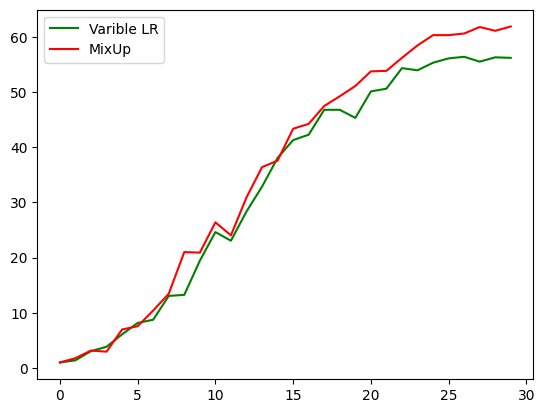

In [192]:
cycle_acc = cycleModel['val_acc_list']
mixUp_acc = mixUp['val_acc_list']
plt.plot(cycle_acc, label = 'Varible LR', color='g')
plt.plot(mixUp_acc, label = 'MixUp', color= 'r')
plt.legend()

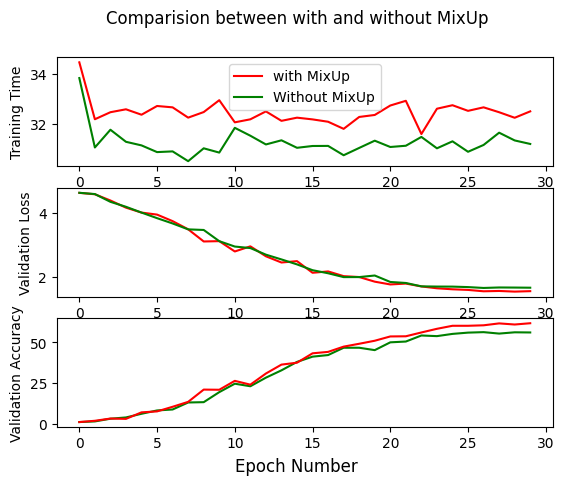

In [198]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(mixUp_time, color= 'r', label = 'with MixUp')
ax1.plot(cycle_time, color='g', label = 'Without MixUp')
ax1.set(ylabel = 'Training Time')
ax1.legend()

ax2.plot(mixUp_val_loss, color= 'r')
ax2.plot(cycle_val_loss, color='g')
ax2.set(ylabel = 'Validation Loss')

ax3.plot(cycle_acc, label = 'Varible LR', color='g')
ax3.plot(mixUp_acc, label = 'MixUp', color= 'r')
ax3.set(ylabel='Validation Accuracy')

fig.supxlabel('Epoch Number')
fig.suptitle("Comparision between with and without MixUp")

fig.savefig('MixUp.png')

<h1><b>Use result with MixUp</b></h1>

In [208]:
with open('AugmentModel/data.pickle' , 'rb') as f:
    aug = CPU_Unpickler(f).load()
aug.keys()

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'batch_size', 'train_transform', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'lr_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1', 'batchnorm_moment'])

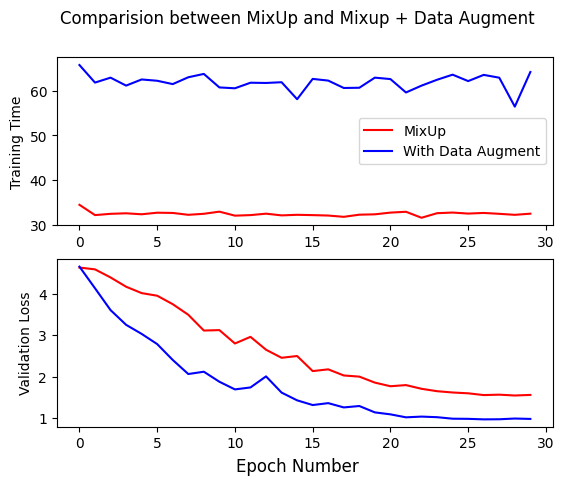

In [210]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(mixUp_time, color= 'r', label = 'MixUp')
ax1.plot(aug['train_time_list'], color='b', label = 'With Data Augment')
ax1.set(ylabel = 'Training Time')
ax1.legend()

ax2.plot(mixUp_val_loss, color= 'r')
ax2.plot(aug['val_loss_list'], color='b')
ax2.set(ylabel = 'Validation Loss')

# ax3.plot(cycle_acc, label = 'Varible LR', color='g')
# ax3.plot(mixUp_acc, label = 'MixUp', color= 'r')
# ax3.set(ylabel='Validation Accuracy')

fig.supxlabel('Epoch Number')
fig.suptitle("Comparision between MixUp and Mixup + Data Augment")
fig.savefig('Augment Compare.png')

<h1>Final Vs Baseline</h1>

In [214]:
final = pd.read_pickle(r'FinalModel/data.pickle')
final.keys()

dict_keys(['time_trained', 'model_name', 'model_seed', 'device_type', 'batch_size', 'train_transform', 'transform', 'lr', 'epochs', 'patience', 'train_loss_list', 'val_loss_list', 'val_acc_list', 'train_time_list', 'lr_list', 'early_stop', 'true_labels', 'pred_softmax_labels', 'pred_labels', 'top_1_accuracy', 'top_5_accuracy', 'f1', 'batchnorm_moment'])

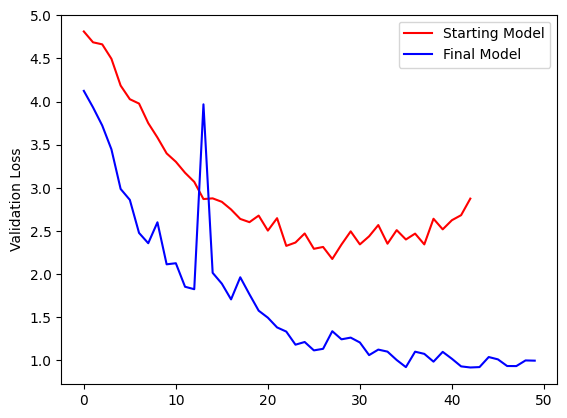

In [223]:
plt.plot(start_val_loss, color= 'r', label = 'Starting Model')
plt.plot(final['val_loss_list'], color='b', label = 'Final Model')
plt.ylabel('Validation Loss')
plt.legend()

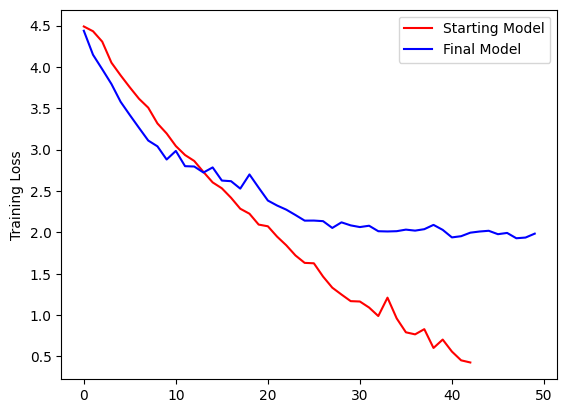

In [224]:
plt.plot(start['train_loss_list'], color= 'r', label = 'Starting Model')
plt.plot(final['train_loss_list'], color='b', label = 'Final Model')
plt.ylabel('Training Loss')
plt.legend()